In [6]:
%matplotlib notebook
import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

traffic = pd.read_csv('traffic.csv')

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns
import scipy.stats as sps
sns.set(style='whitegrid')

In [9]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,New Years Day,263.49,0.0,0,58,Clouds,broken clouds,2013-01-01 00:00:00,1439
1,None,263.78,0.0,0,40,Clouds,scattered clouds,2013-01-01 01:00:00,1502
2,None,264.16,0.0,0,75,Snow,heavy snow,2013-01-01 02:00:00,933
3,None,263.95,0.0,0,90,Clouds,overcast clouds,2013-01-01 03:00:00,576
4,None,263.65,0.0,0,90,Clouds,overcast clouds,2013-01-01 04:00:00,372


In [10]:
traffic.shape

(8573, 9)

In [11]:
features = traffic.columns[1:2].tolist()

In [12]:
features

['temp']

<IPython.core.display.Javascript object>


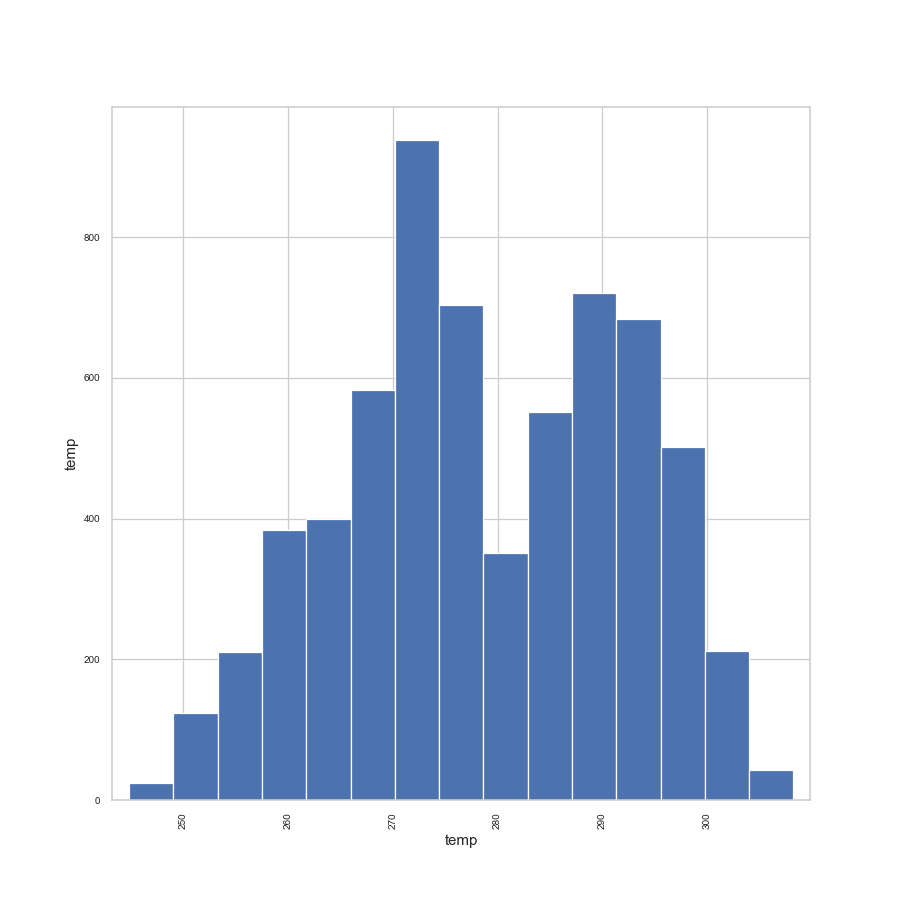

In [13]:
# plotting a scatter matrix
# importing colour map
from matplotlib import cm

X = traffic[features]
y = traffic['traffic_volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(10,10), cmap=cmap)

In [5]:
# For this example, we use the mass, width, and height features of each fruit instance
X = traffic[['temp']]
y = traffic['traffic_volume']

# default is 75% / 25% train-test split
# If we want to keep the same split the value of 'random_state' should be kept the same
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

NameError: name 'traffic' is not defined

In [17]:
X_train.head()

,temp
7868,264.46
2223,279.84
1567,266.83
3780,284.23
6468,296.41


In [18]:
X_train.shape

(6429, 1)

In [14]:
from sklearn.neighbors import KNeighborsClassifier


In [15]:
# instance of the classifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
# accurracy = TP + TN / (TP + TN + FP +FN): Fraction of items on the test_set whose ture label was accurately 
# predicted by the classifier
knn.score(X_test, y_test)

0.0732276119402985

In [23]:
X_test.head()

,temp
8252,264.14
6269,295.30
2293,277.04
6163,296.34
4783,291.17


In [18]:
# Checking prediction
predict = knn.predict(X_test)

In [19]:
predict

array([ 424, 2016, 2330, ..., 4353,  339, 1672], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score
# evaluate accuracy
print(accuracy_score(y_test, predict))

0.0732276119402985


In [33]:
example=[[263]]

In [34]:
traffic_prediction=knn.predict(example)
traffic_prediction[0]

584

In [35]:
knn_2 = KNeighborsClassifier(n_neighbors = 5, metric='euclidean')
knn_2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
predict_2 = knn_2.predict(X_test)
predict_2

array([ 424, 2016, 2330, ..., 4353,  339, 1672], dtype=int64)

In [37]:
print(accuracy_score(y_test, predict_2))

0.0732276119402985


In [39]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)


traffic = pd.read_csv('traffic.csv')

feature_names_traffic = ['temp']
X_traffic = traffic[feature_names_traffic]
y_traffic = traffic['traffic_volume']



X_traffic_2d = traffic[['clouds_all']]
y_traffic_2d = traffic['traffic_volume']

X_train, X_test, y_train, y_test = train_test_split(X_traffic, y_traffic, random_state=0)

# MinMaxScaler, transforms features by scaling each feature to a given range.
# This estimator scales and translates each feature individually such that it is 
# in the given range on the training set, i.e. between zero and one.
# This transformation is often used as an alternative to zero mean, unit variance scaling.
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit to data, then transform it.
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.29
Accuracy of K-NN classifier on test set: 0.07


In [40]:
traffic.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                  int64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

In [43]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

x = traffic.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
combine_data_clean = pd.DataFrame(x_scaled,columns=combine_data_clean.columns)

ValueError: could not convert string to float: 'New Years Day'

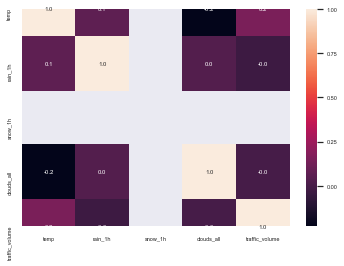

In [45]:
sns.set()
sns.set(font_scale=0.5)
sns.heatmap(traffic[traffic.columns[1:]].corr(),annot=True,fmt=".1f")
plt.show()

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [55]:
X = traffic.drop(['holiday','weather_main'], axis=1)
y = traffic.holiday



In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [57]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)

In [58]:
knMod.fit(X_train, y_train)

ValueError: could not convert string to float: 'overcast clouds'

In [59]:
from adspy_shared_utilities import plot_traffic_knn

plot_traffic_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

ModuleNotFoundError: No module named 'adspy_shared_utilities'

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                   random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[3582.8 4115.  1710.2 1227.8 5094.8 2723.  1776.2 4648.6 3303.2 4254.8
 5013.8 2488.2 2855.6 3390.  2670.8 3344.6 4268.4 3582.8 3268.4 2319.8
 2672.4 4581.6 2898.2 2605.8 2313.2 4719.2 2960.4 4334.  3715.2 3848.6
 1382.  1967.4 3952.8 3458.8 3981.2 3918.2 3994.  3195.   908.8 2618.6
 2582.2 2637.  2802.8 3956.8 2965.4 2379.2 3737.8 3796.2 4309.2 2460.8
 2247.8  813.8 1860.6 3672.8 5195.4 2273.2 4420.  3345.6 4236.8 2654.6
 4346.8 4305.2 5356.4 3397.8 1667.8 3938.6 2054.8 2361.6 3004.4 4449.6
 2670.8 3241.2 4276.2 2305.8 3737.8 1901.6 3310.8 4186.2 1572.2 2731.4
 2679.6 2339.8 3131.4 2936.2 2456.  2417.  3035.2 3230.  5433.  2592.
 2319.8 2168.  3581.2 3078.4 5245.6 4733.8 3545.2 3273.8 3383.6 2770.8
 1888.4 3563.8 2757.   928.4 2542.8 4797.6 2725.4 3556.6 4629.6 2460.8
 4113.6 2374.2 2821.2 3996.2 2079.4 3133.2 3268.4 1901.6 3748.6 3182.
 2389.4 3737.8 3838.6 3769.6 1206.  3076.  4826.2 3737.8 3505.4 2674.8
 1939.6 3637.8 3883.4 3845.4 3890.6 4456.8 3649.8 3609.2 2067.4 4314.8
 4266.4 

<IPython.core.display.Javascript object>


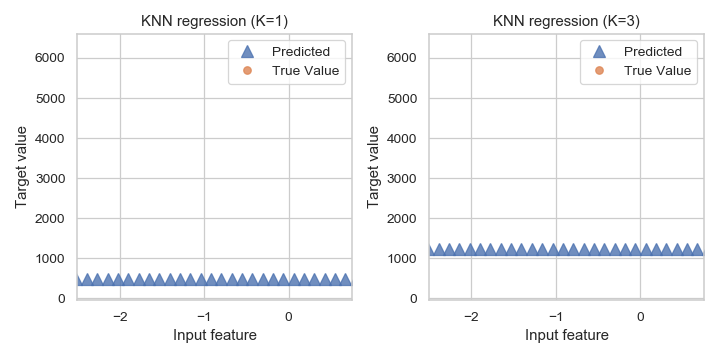

In [23]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_test[0::5], y_test[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


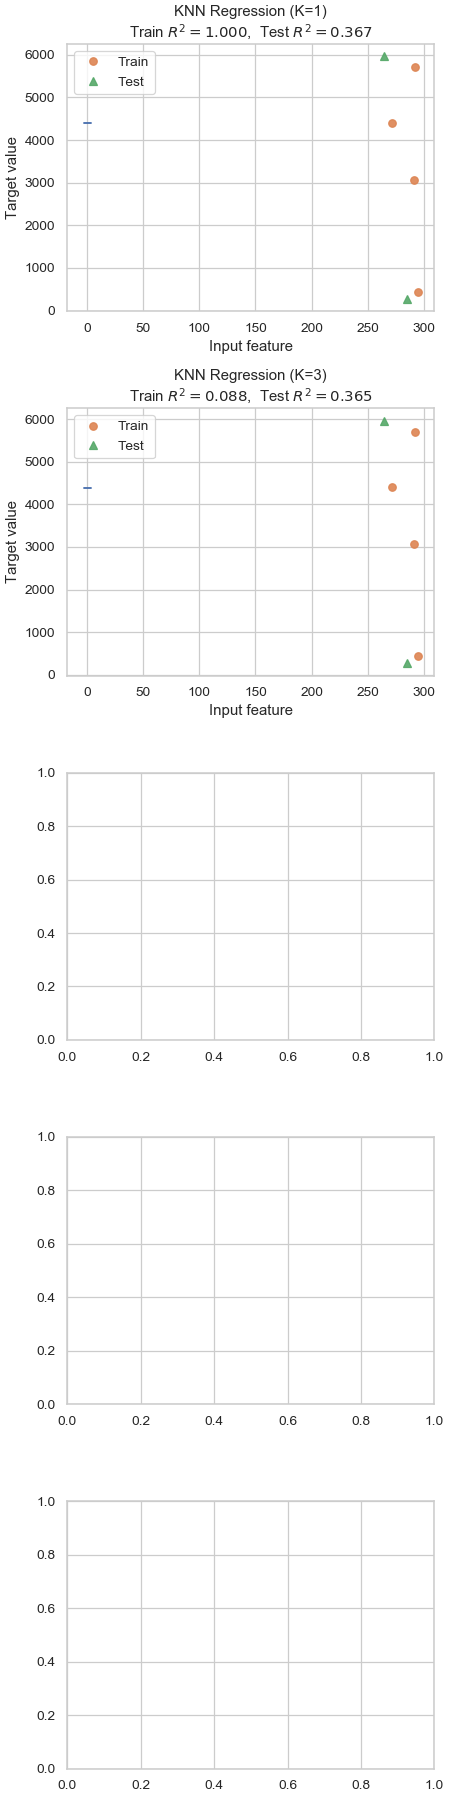

In [28]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [29]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [-994.32938572]
linear model intercept (b): 294214.940
R-squared score (training): 0.412
R-squared score (test): nan


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [30]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_test, y_test,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

ValueError: With n_samples=1, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

<IPython.core.display.Javascript object>


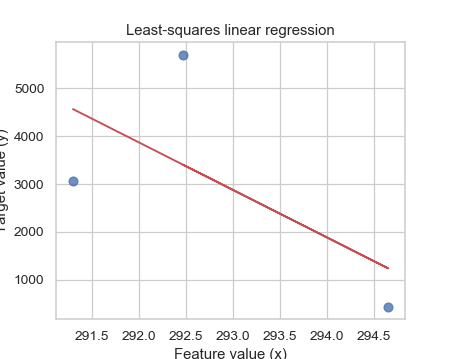

In [33]:
plt.figure(figsize=(5,4))
plt.scatter(X_train, y_train, marker= 'o', s=50, alpha=0.8)
plt.plot(X_train, linreg.coef_ * X_train + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

<IPython.core.display.Javascript object>


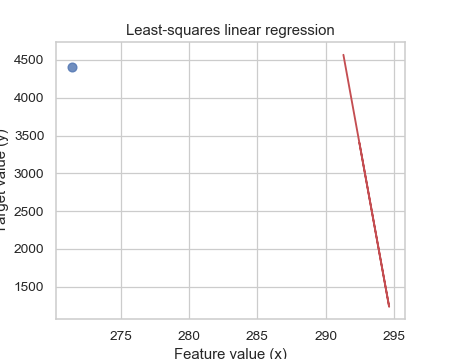

In [34]:
plt.figure(figsize=(5,4))
plt.scatter(X_test, y_test, marker= 'o', s=50, alpha=0.8)
plt.plot(X_train, linreg.coef_ * X_train + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [35]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Traffic dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Traffic dataset
ridge regression linear model intercept: 78414.37425031819
ridge regression linear model coeff:
[-256.66601121]
R-squared score (training): 0.201
R-squared score (test): nan
Number of non-zero features: 1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Traffic dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Traffic dataset
ridge regression linear model intercept: 433.0
ridge regression linear model coeff:
[0.]
R-squared score (training): nan
R-squared score (test): nan
Number of non-zero features: 0


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [37]:
#Ridge regression with regularization parameter: alpha

print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 0, r-squared training: nan, r-squared test: nan

Alpha = 1.00
num abs(coeff) > 1.0: 0, r-squared training: nan, r-squared test: nan

Alpha = 10.00
num abs(coeff) > 1.0: 0, r-squared training: nan, r-squared test: nan

Alpha = 20.00
num abs(coeff) > 1.0: 0, r-squared training: nan, r-squared test: nan

Alpha = 50.00
num abs(coeff) > 1.0: 0, r-squared training: nan, r-squared test: nan

Alpha = 100.00
num abs(coeff) > 1.0: 0, r-squared training: nan, r-squared test: nan

Alpha = 1000.00
num abs(coeff) > 1.0: 0, r-squared training: nan, r-squared test: nan



C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with les

In [39]:
#lasso regression

from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_test, y_test,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Traffic dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_train), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

ValueError: With n_samples=1, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [40]:
#Lasso regression with regularization parameter: alpha

print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 0, r-squared training: nan, r-squared test: nan

Alpha = 1.00
Features kept: 0, r-squared training: nan, r-squared test: nan

Alpha = 2.00
Features kept: 0, r-squared training: nan, r-squared test: nan

Alpha = 3.00
Features kept: 0, r-squared training: nan, r-squared test: nan

Alpha = 5.00
Features kept: 0, r-squared training: nan, r-squared test: nan

Alpha = 10.00
Features kept: 0, r-squared training: nan, r-squared test: nan

Alpha = 20.00
Features kept: 0, r-squared training: nan, r-squared test: nan

Alpha = 50.00
Features kept: 0, r-squared training: nan, r-squared test: nan



C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543

In [41]:
#Polynomial regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

ValueError: With n_samples=1, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [44]:
from sklearn.svm import SVC


X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, train_size=0.8)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)


ValueError: With n_samples=1, test_size=0.2 and train_size=0.8, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [45]:
#logistic regression

from sklearn.linear_model import LogisticRegression



X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                   random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
clf = LogisticRegression().fit(X_train, y_train)
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1.0)



print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

ValueError: With n_samples=1, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [46]:
#Initiate a scaler standardizing estimator

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [49]:
pred = knn.predict(X_test)

In [50]:
#Evaluation of classification quality

from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

[[0 0]
 [1 0]]


In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         433       0.00      0.00      0.00       0.0
        5702       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [52]:
print("Misclassification error rate:",round(np.mean(pred!=y_test),3))

Misclassification error rate: 1.0


In [53]:
error_rate = []

# Will take some time
for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 2

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
clf1 = LogisticRegression(penalty='l2',solver='newton-cg')

In [56]:
clf1.fit(X_train,y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 433

In [57]:
clf1.intercept_

AttributeError: 'LogisticRegression' object has no attribute 'intercept_'

In [58]:
clf1.coef_

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [59]:
clf1.score(X_test,y_test)

NotFittedError: This LogisticRegression instance is not fitted yet

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
nbc = GaussianNB()

In [62]:
nbc.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [63]:
#Prediction, classification report, and confusion matrix

y_pred = nbc.predict(X_test)
mislabel = np.sum((y_test!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 1 test samples is 1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)


In [64]:
from sklearn.metrics import classification_report

In [65]:
print("The classification report is as follows...\n")
print(classification_report(y_pred,y_test))

The classification report is as follows...

              precision    recall  f1-score   support

         433       0.00      0.00      0.00       1.0
        5702       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)

In [69]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [70]:
predictions = dtree.predict(X_test)

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

In [72]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         433       0.00      0.00      0.00       0.0
        5702       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [73]:
cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[0 0]
 [1 0]]
Accuracy of prediction: 0.0


In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rfc = RandomForestClassifier(n_estimators=600)

In [76]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
rfc_pred = rfc.predict(X_test)

In [78]:
cr = classification_report(y_test,predictions)

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [79]:
print(cr)

              precision    recall  f1-score   support

         433       0.00      0.00      0.00       0.0
        5702       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



In [80]:
cm = confusion_matrix(y_test,rfc_pred)
print(cm)

[[0 0]
 [1 0]]
